## Imports

First, you will import the required libraries. You've used all of these already in the previous labs.

In [1]:
import tensorflow as tf
import numpy as np 
import re
import os
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
#from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Process data
def process_data(file_path):
    with open(file_path, "r") as file:
        file_content = file.read()
    # Remove "(", ")", and "," characters
    file_content = file_content.replace("(", "").replace(")", "").replace(",", "")
    # Print the content or perform further operations
    return file_content

## Building the Word Vocabulary

In [10]:
def remove_stopwords(input_file, stopwords_file):
    with open(input_file, 'r') as f_input:
        text = f_input.read()

    with open(stopwords_file, 'r') as f_stopwords:
        stopwords = [word.strip() for word in f_stopwords.readlines()]

    # Tokenize the text into words
    words = text.split("\n")

    # Remove stopwords
    words_without_stopwords = [word for word in words if word.lower() not in stopwords]

    # Join the words back into a string
    cleaned_text = '\n'.join(words_without_stopwords)

    # Remove specific characters
    characters_to_remove = [',', '(', ')', '&', '/', '-', '+', '*', '%', '!']
    for char in characters_to_remove:
        cleaned_text = cleaned_text.replace(char, ' ')

    return cleaned_text

In [11]:
# Define the lyrics of the song
stopword_path='../stopword.txt'
file_path = '../column_data_nama.txt'
cleaned_text = remove_stopwords(file_path, stopword_path)
print(cleaned_text)

Krim Sup Ayam  Kalengan  Terkondensasi 
Belalang Goreng
Getuk Goreng
Bakso Goreng
Paha Ayam Panggang  Kulit Dimakan 
Kuah Kaldu Ayam  Kalengan 
Polenta Goreng
Pastry Diisi dengan Kentang dan Kacang  Goreng 
Daging Ayam  Panggang  Bakar  Dimasak 
Daging dan Kulit Ayam  Panggang 
Pepes Ayam
Opor Ayam
Ayam Woku
Bakpao Ayam
Ayam Cincang Buncis
Paru Sapi Goreng
Sambal Goreng Kentang
Sosis Ayam
Sup Mie Ayam
Flauta dengan Ayam
Burrito dengan Ayam
Sup Ayam Kental  Kalengan 
Nasi Goreng Cina
Daging Kambing Goreng
Potongan Daging Babi Goreng
Ikan Bandeng Goreng
Ikan Tongkol Goreng
Nasi Goreng Oatmeal
Dada Ayam Masak
Salad Ayam atau Kalkun
Daging dan Kulit Sayap Ayam  Ayam Pedaging 
Daging Paha dan Kulit Ayam  Ayam Pedaging 
Daging Ayam  Panggang 
Ayam
Ayam Penyet
Lumpia Ayam
Sayap Ayam
Paha Ayam
Kaki Ayam
Dada Ayam
Oncom Goreng
Bebek Goreng
Ubi Goreng
Roti Goreng
Bihun Goreng
Udang Goreng
Daging Paha Ayam  Ayam Pedaging 
Daging Dada Ayam  Ayam Pedaging 
Usus Ayam
Mee Goreng
Toge Goreng
Pisang Go

In [12]:
#word = process_data(file_path)
# Split the long string per line and put in a list
corpus = cleaned_text.lower().split("\n")

# Preview the result
print(corpus)

['krim sup ayam  kalengan  terkondensasi ', 'belalang goreng', 'getuk goreng', 'bakso goreng', 'paha ayam panggang  kulit dimakan ', 'kuah kaldu ayam  kalengan ', 'polenta goreng', 'pastry diisi dengan kentang dan kacang  goreng ', 'daging ayam  panggang  bakar  dimasak ', 'daging dan kulit ayam  panggang ', 'pepes ayam', 'opor ayam', 'ayam woku', 'bakpao ayam', 'ayam cincang buncis', 'paru sapi goreng', 'sambal goreng kentang', 'sosis ayam', 'sup mie ayam', 'flauta dengan ayam', 'burrito dengan ayam', 'sup ayam kental  kalengan ', 'nasi goreng cina', 'daging kambing goreng', 'potongan daging babi goreng', 'ikan bandeng goreng', 'ikan tongkol goreng', 'nasi goreng oatmeal', 'dada ayam masak', 'salad ayam atau kalkun', 'daging dan kulit sayap ayam  ayam pedaging ', 'daging paha dan kulit ayam  ayam pedaging ', 'daging ayam  panggang ', 'ayam', 'ayam penyet', 'lumpia ayam', 'sayap ayam', 'paha ayam', 'kaki ayam', 'dada ayam', 'oncom goreng', 'bebek goreng', 'ubi goreng', 'roti goreng', '

In [13]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'ayam': 1, 'kacang': 2, 'goreng': 3, 'segar': 4, 'chicken': 5, 'rasa': 6, 'daging': 7, 'chocolate': 8, 'roti': 9, 'susu': 10, 'milk': 11, 'keju': 12, 'dengan': 13, 'mie': 14, 'sapi': 15, 'cheese': 16, 'ikan': 17, 'mcdonalds': 18, 'nasi': 19, 'dan': 20, 'pizza': 21, 'sandwich': 22, 'burger': 23, 'with': 24, 'almond': 25, 'coklat': 26, 'taco': 27, 'kering': 28, 'choco': 29, 'hut': 30, 'pedas': 31, 'cokelat': 32, 'isi': 33, 'krim': 34, 'king': 35, 'mi': 36, 'saus': 37, 'lemak': 38, 'hijau': 39, 'telur': 40, 'bell': 41, 'panggang': 42, 'atau': 43, 'manis': 44, 'salad': 45, 'tanpa': 46, 'cream': 47, 'subway': 48, 'daun': 49, 'masakan': 50, 'medium': 51, 'bumbu': 52, 'dimasak': 53, 'strawberry': 54, 'dominos': 55, 'double': 56, 'spicy': 57, 'kue': 58, 'rice': 59, 'bawang': 60, 'merah': 61, 'vanilla': 62, 'kulit': 63, 'gandum': 64, 'crispy': 65, 'kfc': 66, 'sambal': 67, 'pisang': 68, 'tepung': 69, 'mentah': 70, 'pasta': 71, 'tea': 72, 'soto': 73, 'beef': 74, 'minyak': 

## Preprocessing the Dataset

Next, you will be generating the training sequences and their labels. As discussed in the lectures, you will take each line of the song and generate inputs and labels from it. For example, if you only have one sentence: "I am using Tensorflow", you want the model to learn the next word given any subphrase of this sentence:

```
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow
```

The next cell shows how to implement this concept in code. The result would be inputs as padded sequences, and labels as one-hot encoded arrays.

In [14]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [15]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['krim', 'sup', 'ayam', 'kalengan', 'terkondensasi']
[34, 91, 1, 81, 858]


In [16]:
# Pick element
elem_number = 10

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 317   1  42
  63]
decoded to text: ['paha ayam panggang kulit']


In [17]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 227


If you pick the element before that, you will see the same subphrase as above minus one word:

In [18]:
# Pick element
elem_number = 20

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0 859 860  13 108  20
   2]
decoded to text: ['pastry diisi dengan kentang dan kacang']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 3


In [19]:
print(xs)
inner_array = xs[1]

# Calculate the length of the inner array
length = len(inner_array)

print(length)  

[[  0   0   0 ...   0   0  34]
 [  0   0   0 ...   0  34  91]
 [  0   0   0 ...  34  91   1]
 ...
 [  0   0   0 ...   0   0 205]
 [  0   0   0 ...   0 205 212]
 [  0   0   0 ... 205 212 221]]
19


In [20]:
print(ys)
inner_array = ys[1]

# Calculate the length of the inner array
length = len(inner_array)

print(length)  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3547


## Build the Model

Next, you will build the model with basically the same layers as before. The main difference is you will remove the sigmoid output and use a softmax activated `Dense` layer instead. This output layer will have one neuron for each word in the vocabulary. So given an input token list, the output array of the final layer will have the probabilities for each word.

In [21]:
# Build the model
model = Sequential([
          Embedding(total_words, 100, input_length=max_sequence_len-1),
          LSTM(72),
          #Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              #optimizer='adam',
              #optimizer=optimizer,
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           354700    
                                                                 
 lstm (LSTM)                 (None, 72)                49824     
                                                                 
 dense (Dense)               (None, 3547)              258931    
                                                                 
Total params: 663,455
Trainable params: 663,455
Non-trainable params: 0
_________________________________________________________________


## Train the model

You can now train the model. We have a relatively small vocabulary so it will only take a couple of minutes to complete 500 epochs.

In [22]:
# Train the model
history = model.fit(xs, ys, epochs=500, batch_size=50)

Epoch 1/500
436/436 [==============================] - 12s 23ms/step - loss: 6.8113 - accuracy: 0.0223
Epoch 2/500
436/436 [==============================] - 11s 24ms/step - loss: 6.4313 - accuracy: 0.0279
Epoch 3/500
436/436 [==============================] - 11s 26ms/step - loss: 6.2360 - accuracy: 0.0489
Epoch 4/500
436/436 [==============================] - 10s 23ms/step - loss: 5.9346 - accuracy: 0.0679
Epoch 5/500
436/436 [==============================] - 11s 26ms/step - loss: 5.6289 - accuracy: 0.0964
Epoch 6/500
436/436 [==============================] - 9s 21ms/step - loss: 5.3278 - accuracy: 0.1316
Epoch 7/500
436/436 [==============================] - 10s 23ms/step - loss: 5.0257 - accuracy: 0.1731
Epoch 8/500
436/436 [==============================] - 10s 23ms/step - loss: 4.7471 - accuracy: 0.2020
Epoch 9/500
436/436 [==============================] - 10s 22ms/step - loss: 4.4938 - accuracy: 0.2241
Epoch 10/500
436/436 [==============================] - 10s 23ms/step - lo

436/436 [==============================] - 11s 24ms/step - loss: 1.2637 - accuracy: 0.6190
Epoch 81/500
436/436 [==============================] - 10s 24ms/step - loss: 1.2600 - accuracy: 0.6198
Epoch 82/500
436/436 [==============================] - 11s 24ms/step - loss: 1.2545 - accuracy: 0.6215
Epoch 83/500
436/436 [==============================] - 10s 23ms/step - loss: 1.2505 - accuracy: 0.6193
Epoch 84/500
436/436 [==============================] - 10s 24ms/step - loss: 1.2459 - accuracy: 0.6229
Epoch 85/500
436/436 [==============================] - 11s 24ms/step - loss: 1.2419 - accuracy: 0.6195
Epoch 86/500
436/436 [==============================] - 12s 28ms/step - loss: 1.2380 - accuracy: 0.6216
Epoch 87/500
436/436 [==============================] - 10s 23ms/step - loss: 1.2351 - accuracy: 0.6204
Epoch 88/500
436/436 [==============================] - 10s 23ms/step - loss: 1.2311 - accuracy: 0.6231
Epoch 89/500
436/436 [==============================] - 10s 23ms/step - loss:

436/436 [==============================] - 8s 18ms/step - loss: 1.1164 - accuracy: 0.6307
Epoch 159/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1142 - accuracy: 0.6347
Epoch 160/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1142 - accuracy: 0.6313
Epoch 161/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1139 - accuracy: 0.6333
Epoch 162/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1137 - accuracy: 0.6309
Epoch 163/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1124 - accuracy: 0.6337
Epoch 164/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1128 - accuracy: 0.6313
Epoch 165/500
436/436 [==============================] - 8s 19ms/step - loss: 1.1145 - accuracy: 0.6316
Epoch 166/500
436/436 [==============================] - 8s 18ms/step - loss: 1.1129 - accuracy: 0.6337
Epoch 167/500
436/436 [==============================] - 8s 18ms/step - loss: 

436/436 [==============================] - 8s 18ms/step - loss: 1.0862 - accuracy: 0.6347
Epoch 237/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0866 - accuracy: 0.6325
Epoch 238/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0853 - accuracy: 0.6334
Epoch 239/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0849 - accuracy: 0.6321
Epoch 240/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0836 - accuracy: 0.6350
Epoch 241/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0859 - accuracy: 0.6328
Epoch 242/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0839 - accuracy: 0.6362
Epoch 243/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0835 - accuracy: 0.6342
Epoch 244/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0849 - accuracy: 0.6337
Epoch 245/500
436/436 [==============================] - 8s 18ms/step - loss: 

436/436 [==============================] - 8s 19ms/step - loss: 1.0740 - accuracy: 0.6354
Epoch 315/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0745 - accuracy: 0.6332
Epoch 316/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0749 - accuracy: 0.6347
Epoch 317/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0739 - accuracy: 0.6350
Epoch 318/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0733 - accuracy: 0.6333
Epoch 319/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0735 - accuracy: 0.6340
Epoch 320/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0736 - accuracy: 0.6343
Epoch 321/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0732 - accuracy: 0.6362
Epoch 322/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0736 - accuracy: 0.6351
Epoch 323/500
436/436 [==============================] - 8s 19ms/step - loss: 

436/436 [==============================] - 8s 18ms/step - loss: 1.0672 - accuracy: 0.6353
Epoch 393/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0672 - accuracy: 0.6360
Epoch 394/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0675 - accuracy: 0.6351
Epoch 395/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0674 - accuracy: 0.6358
Epoch 396/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0677 - accuracy: 0.6338
Epoch 397/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0685 - accuracy: 0.6345
Epoch 398/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0684 - accuracy: 0.6328
Epoch 399/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0681 - accuracy: 0.6366
Epoch 400/500
436/436 [==============================] - 8s 18ms/step - loss: 1.0675 - accuracy: 0.6357
Epoch 401/500
436/436 [==============================] - 8s 18ms/step - loss: 

436/436 [==============================] - 10s 22ms/step - loss: 1.0632 - accuracy: 0.6366
Epoch 471/500
436/436 [==============================] - 10s 23ms/step - loss: 1.0642 - accuracy: 0.6355
Epoch 472/500
436/436 [==============================] - 9s 21ms/step - loss: 1.0634 - accuracy: 0.6361
Epoch 473/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0638 - accuracy: 0.6367
Epoch 474/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0639 - accuracy: 0.6363
Epoch 475/500
436/436 [==============================] - 8s 19ms/step - loss: 1.0631 - accuracy: 0.6361
Epoch 476/500
436/436 [==============================] - 9s 20ms/step - loss: 1.0639 - accuracy: 0.6348
Epoch 477/500
436/436 [==============================] - 9s 20ms/step - loss: 1.0631 - accuracy: 0.6347
Epoch 478/500
436/436 [==============================] - 9s 20ms/step - loss: 1.0634 - accuracy: 0.6357
Epoch 479/500
436/436 [==============================] - 8s 19ms/step - loss

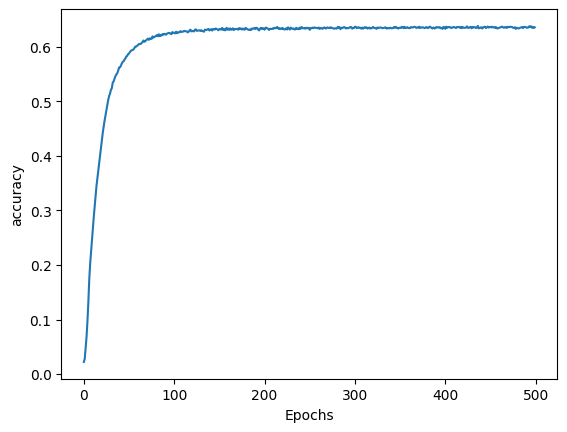

In [23]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

With the model trained, you can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. See how it is implemented in the code below:

In [ ]:
# Define seed text
seed_text = "Daging"

# Define total words to predict
next_words = 1

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

In the output above, you might notice frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, you will get the top three indices and choose one at random. See if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three. Feel free to improve it and of course, you can also develop your own method of picking the next word.

In [ ]:
# Define seed text
seed_text = "daging"

# Define total words to predict
next_words = 2

# Loop until desired length is reached
for _ in range(next_words):

  # Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3,4,5])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
    output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
    seed_text += " " + output_word

# Print the result	
print(seed_text)

In [ ]:
# Define seed text
seed_text = "ayam"

# Define total words to predict
next_words = np.random.choice([1, 2, 3])  # Randomly select the number of next words to predict

# Loop until desired length is reached
for _ in range(next_words):
    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice(range(1, 11))

    # Sort the probabilities in ascending order
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:
        # Look up the word associated with the index.
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result
print(seed_text)


In [24]:
# Define seed text
seed_text = "ayam"

# Define total sentences to predict
total_sentences = 5

# Loop until desired number of sentences is reached
for _ in range(total_sentences):
    # Define total words to predict for each sentence
    next_words = np.random.choice([1, 2, 3])  # Randomly select the number of next words to predict

    # Reset seed text for each sentence
    sentence = seed_text

    # Generate sentence
    for _ in range(next_words):
        # Convert the seed text to a token sequence
        token_list = tokenizer.texts_to_sequences([sentence])[0]

        # Pad the sequence
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        # Feed to the model and get the probabilities for each index
        probabilities = model.predict(token_list)

        # Pick a random number from [1,2,3]
        choice = np.random.choice(range(1, 11))

        # Sort the probabilities in ascending order
        # and get the random choice from the end of the array
        predicted = np.argsort(probabilities)[0][-choice]

        # Ignore if index is 0 because that is just the padding.
        if predicted != 0:
            # Look up the word associated with the index.
            output_word = tokenizer.index_word[predicted]

            # Combine with the seed text
            sentence += " " + output_word

    # Print the sentence
    print(sentence)


1/1 [==============================] - 0s 24ms/step
ayam goreng belacan
1/1 [==============================] - 0s 18ms/step
ayam panggang bumbu burung
1/1 [==============================] - 0s 18ms/step
ayam woku
1/1 [==============================] - 0s 22ms/step
ayam suwir
1/1 [==============================] - 0s 20ms/step
ayam suwir goreng


## Wrap Up

In this lab, you got a first look at preparing data and building a model for text generation. The corpus is fairly small in this particular exercise and in the next lessons, you will be building one from a larger body of text. See you there!